##  Polytropic and Isothermal Gas Spheres

To more details, you can see Chandrasekhar, S. *An Introduction to the Study of Stellar Structure, Dove, 2010, chapter 4*.

### Lane-Emden equation (numeric solution)

Remember the Lane-Emden equation
\begin{equation*}
    \dfrac{1}{\xi^2} \dfrac{d}{d\xi}\left[ \xi^2 \dfrac{d\theta_n}{d\xi}\right] = -\theta^n,
\end{equation*}
where $\xi = r/a$ is the dimensionless radius, $\theta_n$ (defined as $\theta^n(r) = \rho(r)/\lambda$) is the dimensionless mass density, and $n$ are the polytropic index.

To solve the Lane-Emden equation, consider two consecutives integrations, i.e., rewrite the L-E eq as
\begin{align*}
    \dfrac{d}{d\xi}\left[ \xi^2 \dfrac{d\theta}{d\xi}\right] &= -\xi^2 \theta^n, \\
    \xi^2 \dfrac{d\theta}{d\xi} &= -\int \xi^2 \theta^n\ d\xi, \\
    -\xi^2 \dfrac{d\theta}{d\xi} &= \int \xi^2 \theta^n\ d\xi,
\end{align*}
to simplify the notation, let's define a function $f_1$ as 
\begin{equation*}
    f_1(\xi) := -\xi^2 \dfrac{d\theta}{d\xi}
    \hspace{0.5cm} \equiv \hspace{0.5cm}
    f_1(\xi) = \int \xi^2 \theta^n\ d\xi.
\end{equation*}

Then, 
\begin{align*}    
    -\xi^2 \dfrac{d\theta}{d\xi} &= f_1(\xi), \\
    \dfrac{d\theta}{d\xi} &= -\dfrac{f_1(\xi)}{\xi^2}, \\
    \theta(\xi) &= -\int \dfrac{f_1(\xi)}{\xi^2}\ d\xi,
\end{align*}
where we must to solve numerically the integrals, first for $f_1(\xi)$ and then for $\theta(\xi)$.

Additionally, remember that we must cut the solutions at the first zero $\xi_1$, i.e., we must solve the integrals
\begin{align*}    
    f_1(\xi) &= \int_0^{\xi_1} \xi^2 \theta^n\ d\xi, \\
    \theta(\xi) &= -\int_0^{\xi_1} \dfrac{f_1(\xi)}{\xi^2}\ d\xi,
\end{align*}
with the boundary conditions
\begin{align*}
    \theta(\xi=0) &= 1, \\
    \dfrac{d\theta}{d\xi} \Bigg|_{\xi = 0} &= 0
    \hspace{0.5cm}\equiv\hspace{0.5cm}
    f_1(\xi=0) = 0.
\end{align*}

To do the numeric integration, let's create a method called `LaneEnden()`. Note that we will integrate using the boundary conditions in a naive approach.

In [1]:
def LaneEnden(n, 
              𝜉_0 = 1e-6, 𝜉_f = 20, N = 10**6,
              𝜃_0 = 1, f1_0 = 0):
    '''
    ------------------------------------------
    LaneEnden()
    ------------------------------------------
    Computes the numerical integration for the
    Lane-Enden equation
        (1/𝜉²)d/d𝜉[𝜉²d𝜃/d𝜉] = -𝜃^n.
    
    Inputs:
        n   : polytropic index
    
    Parameters:
        𝜉_0, 𝜉_f : boundaries
        N   : Number of samples in [𝜉_0, 𝜉_f]
        𝜃_0 : 1st boundary condition
        f1_0: 2nd boundary condition
      
    Output:
        𝜉 : dimentionless radius
        𝜃 : dimentionless mass density
    '''
    # Initialize 𝜉, f1 and 𝜃 for the integration
    𝜉_array, f1_array, 𝜃_array = [], [], []               
    
    # Numerical integration
    d𝜉  = (𝜉_f - 𝜉_0)/N
    
    for i in range(N):
        # boundary conditions at i = 0
        if i == 0:
            𝜉  = 𝜉_0         
            f1 = f1_0
            𝜃  = 𝜃_0
        else:
            f1 += 𝜉**2 * 𝜃**n * d𝜉
            𝜃  += -f1/𝜉**2 * d𝜉    
            𝜉  += d𝜉

        𝜉_array.append(𝜉)
        f1_array.append(f1)
        𝜃_array.append(𝜃)

        if 𝜃 <= 0.0:        
            break
    
    return 𝜉_array, f1_array, 𝜃_array

To test the method `LaneEnden()`, let's create a method called `LaneEnden()` to plot $\theta_n$ vs $\xi$.

In [70]:
def plotLaneEnden(𝜉_0 = -0.5, 𝜉_f = 18,
                  𝜃_0 = -0.5, 𝜃_f = 1.1):
    '''
    ------------------------------------------
    plotLaneEnden()
    ------------------------------------------
    Create an empty figure, set the axis and
    returns the figure and axis object.
    '''
    fig, ax = plt.subplots()
    
    ax.axvline(x=0, c='black')
    ax.axhline(y=0, c='black')
    ax.set_xlabel(r'$\xi$ ( )')
    ax.set_ylabel(r'$\theta$ ( )')    
    ax.set_title('Family of solutions to the Lane-Emden '\
                 'equation\n (cut it at the first zero)', 
                 fontsize = 12, fontweight ='bold')
    ax.set_xlim(𝜉_0, 𝜉_f)
    ax.set_ylim(𝜃_0, 𝜃_f)
    ax.grid()
    
    return fig, ax

Ok, now call the methods

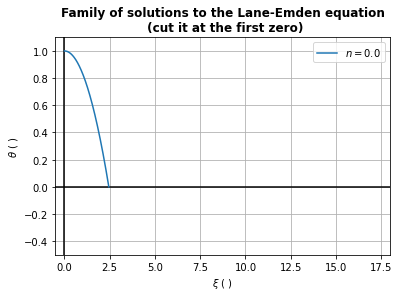

In [134]:
import numpy as np
from matplotlib import pyplot as plt

# Attributes
𝜉_0  = 1e-10                   # 𝜉 initial (boundary)
𝜉_f  = 17.5                    # 𝜉 final
N    = 10**5                   # Samples in 𝜉
n = np.linspace(0, 4, 9)       # polytropic indices n

# Auxiliar Attributes
plots = []                     # plot objects

# Call the method `LaneEnden()`
𝜉, f1, 𝜃 = LaneEnden(n = n[0],
                     𝜉_0 = 𝜉_0, 𝜉_f = 𝜉_f, N = N)

# Plot 𝜃 vs 𝜉 for n=0, to see if the method works
fig, ax = plotLaneEnden()
plots += ax.plot(𝜉, 𝜃, label=r'$n = $'+str(n[0]))
lgd = ax.legend(handles=plots, loc='upper right')

We can compare this line with the figure 1 at the class notes, it's success!

Additionally, note that the method `LaneEnden()` was designed such that the maximum `𝜉` is the zero $\xi_1$ and the maximum `f1` is 
$$ f(\xi_1) = - \xi_1^2 \left( \dfrac{d\theta_n}{d\xi} \right)_{\xi_1}, $$
i.e., at this point we have the 3 first columns of the table for the exercise 2, i.e.,

In [135]:
n[0], max(𝜉), max(f1)

(0.0, 2.4494750000860455, 4.898366048737107)

you can compare these values with the table 2 at the class notes.

Since the methods `LaneEnden()` and `plotLaneEnden()` works fine, it's time to compute and plot $\theta_n$ vs $\xi$ for all the $n$. We will do this in the following code block

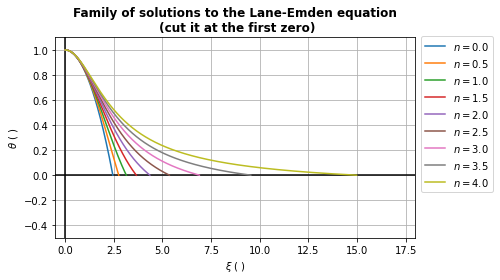

In [150]:
import numpy as np
from matplotlib import pyplot as plt

# Attributes (additionals)
plots = []                     # plot objects
𝜉1    = []                     # first zeros of 𝜃(𝜉)
f1_𝜉1 = []                     # f1(𝜉_1)

## Plot 𝜃 vs 𝜉 for all n
# Create a figure calling the method `plotLaneEnden()`
fig, ax = plotLaneEnden()

for n_i in n:
    # Integrate f1 and 𝜃 calling the method `LaneEnden()`
    𝜉, f1, 𝜃 = LaneEnden(n = n_i,
                         𝜉_0 = 𝜉_0, 𝜉_f = 𝜉_f, N = N)

    # Plot 𝜃 vs 𝜉 for n_i
    plots += ax.plot(𝜉, 𝜃, label=r'$n = $'+str(n_i))
    
    # Save the zero 𝜉_1 and f1(𝜉_1) for n_i
    𝜉1.append(max(𝜉))
    f1_𝜉1.append(max(f1))

lgd = fig.legend(handles=plots,
                 bbox_to_anchor=(1.15, 0.86),
                 borderaxespad=0)
fig.tight_layout()

Even more, we could plot the 3 analytical solutions $\theta_0(\xi)$, $\theta_1(\xi)$, and $\theta_5(\xi)$, i.e.,

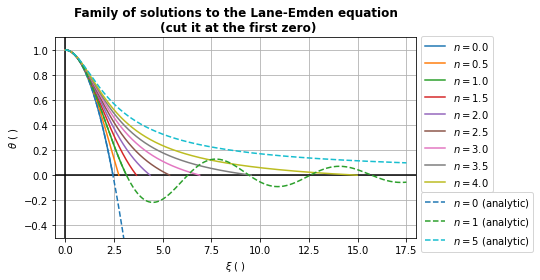

In [151]:
# Temporal Attribute
𝜉_a = np.linspace(𝜉_0, 𝜉_f, N)   # 𝜉 analytical

# Plot the analytical 𝜃(𝜉)
for n_i in [0,1,5]:    
    if n_i == 0:
        𝜃_a = 1 - 𝜉_a**2/6
        plots += ax.plot(𝜉_a, 𝜃_a, '--',
                     color = plots[0].get_color(),
                     label=r'$n = $'+str(n_i)+' (analytic)')
    elif n_i == 1:
        𝜃_a = np.sin(𝜉_a)/𝜉_a
        plots += ax.plot(𝜉_a, 𝜃_a, '--',
                     color = plots[2].get_color(),
                     label=r'$n = $'+str(n_i)+' (analytic)')
    elif n_i == 5:
        𝜃_a = 1/np.sqrt(1 + 𝜉_a**2/3)    
        plots += ax.plot(𝜉_a, 𝜃_a, '--',        
                     label=r'$n = $'+str(n_i)+' (analytic)')

# Create a second legend and add the artist manually.
from matplotlib.legend import Legend

lgd_a = Legend(ax, [plots[9], 
                    plots[10],
                    plots[11]],
                   [plots[9].get_label(),
                    plots[10].get_label(),
                    plots[11].get_label()],
               bbox_to_anchor=(1.325, 0.23),
               borderaxespad=0)

fig.add_artist(lgd_a);
fig.tight_layout()
fig

Additionaly, at this point we can create a dataframe with the 3 first columns of the table of the exercise 2, i.e.,

In [137]:
import pandas as pd

data = {'n'      : n,
        '𝜉1'     : 𝜉1,
        'f1(𝜉1)' : f1_𝜉1
       }
df = pd.DataFrame(data)
display(df)

del 𝜉1, f1_𝜉1, 𝜉_a, 𝜃_a   # delete temporal attributes

,n,𝜉1,f1(𝜉1)
0,0.0,2.449475,4.898366
1,0.5,2.752575,3.787879
2,1.0,3.141600,3.140989
3,1.5,3.653825,2.713567
4,2.0,4.352950,2.410645
5,2.5,5.355525,2.186868
6,3.0,6.897450,2.017963
7,3.5,9.537325,1.890336
8,4.0,14.975450,1.797060


We can compare this picture with the figure 1 at the class notes, they are match.

### Physical Characteristics 

#### Radius

In [149]:
plots[0].get_label()

'$n = $0.0'

   Let's define the indices $n$ and the domain $\xi$.